# 소비자 세그멘테이션 데이터 EDA

## 데이터 소개

* 제품이나 서비스를 마케팅하고 판매할 때는 고객마다 선호, 요구, 행동이 다르다는 것을 염두에 두어야 하며, 이러한 차이를 이해하는 것이 고객에게 효과적으로 다가가고 참여할 수 있다.
* 이를 위한 한 가지 강력한 방법은 연령별로 고객을 세분화하는 것이다. 그렇게 함으로써 각 그룹에 더 잘 전달되고 궁극적으로 더 많은 판매와 고객 충성도를 이끌어 낼 수 있도록 마케팅 전략을 조정할 수 있다.
* 더욱이 높은 수익을 창출하는 기업은 낮은 수익을 창출하는 기업보다 더 가치가 있다.
* 기업의 가치는 미래의 수익 창출 능력에 의해 결정된다. 따라서 기업은 어떤 제품이 높은 수익을 창출하고 있는지 파악하는 것이 중요하다.다.

## 분석의 목적

* 데이터를 활용하여 다음과 같은 목적을 위해 분석해보고자 한다.
1. 다양한 연령대가 매출 및 이익에 미치는 영향2. 
가장 높은 수익과 수익을 창출하고 있는 제품

## 컬럼 설명

* Date: 날짜
* Day: 일
* Month: 월
* Year: 년
* Customer_Age: 소비자 나이
* Age_Group: 나이 범주
* Age_Group_NUMBER: 나이 범주(숫자)
* Customer_Gender: 소비자 성별
* Country: 국가
* Product_Category: 상품 카테고리
* Order_Quantity: 주문 수량
* Unit_Cost: 원가
* Unit_Price: 단가
* Profit: 이익
* Cost: 비용
* Revenue: 수익
* Revenue: 수익

## 1.데이터 불러오기

In [1]:
# 라이브러리 호출
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# 데이터 불러오기
df = pd.read_csv('C:/Users/chunc/OneDrive/바탕 화면/Python연습/Customer Segmentation/PRODUCT SALES.csv')
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Age_Group_NUMBER,Customer_Gender,Country,Product_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,01-01-17,1,January,2017,17,Youth (<25),1,M,canada,Bikes,2,1519.0,2443.0,1848.0,3038.0,4886.0
1,01-01-17,1,January,2017,23,Youth (<25),1,M,Australia,Bikes,2,1252.0,2295.0,2086.0,2504.0,4590.0
2,01-01-17,1,January,2017,33,Young Adults (25-34),1,F,France,Bikes,2,2171.0,3578.0,2814.0,4342.0,7156.0
3,01-01-17,1,January,2017,39,Adults (35-64),1,M,United States,Bikes,2,713.0,1120.0,814.0,1426.0,2240.0
4,01-01-17,1,January,2017,42,Adults (35-64),1,M,United States,Bikes,2,344.0,540.0,392.0,688.0,1080.0


In [3]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              113036 non-null  object 
 1   Day               113036 non-null  int64  
 2   Month             113036 non-null  object 
 3   Year              113036 non-null  int64  
 4   Customer_Age      113036 non-null  int64  
 5   Age_Group         113036 non-null  object 
 6   Age_Group_NUMBER  113036 non-null  int64  
 7   Customer_Gender   113036 non-null  object 
 8   Country           113036 non-null  object 
 9   Product_Category  113036 non-null  object 
 10  Order_Quantity    113036 non-null  int64  
 11  Unit_Cost         113036 non-null  float64
 12  Unit_Price        113036 non-null  float64
 13  Profit            113036 non-null  float64
 14  Cost              113036 non-null  float64
 15  Revenue           113036 non-null  float64
dtypes: float64(5), int64

In [4]:
# Year컬럼의 데이터유형 변경
df['Year'] = df['Year'].astype(str)
df['Year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 113036 entries, 0 to 113035
Series name: Year
Non-Null Count   Dtype 
--------------   ----- 
113036 non-null  object
dtypes: object(1)
memory usage: 883.2+ KB


In [5]:
# Day컴럼의 데이터유형 변경
df['Day'] = df['Day'].astype(str)
df['Day'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 113036 entries, 0 to 113035
Series name: Day
Non-Null Count   Dtype 
--------------   ----- 
113036 non-null  object
dtypes: object(1)
memory usage: 883.2+ KB


In [6]:
# 통계 매트릭 탐색
df.describe().round(2).style.format(precision = 2).background_gradient(cmap = 'Greens') 

,Customer_Age,Age_Group_NUMBER,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.00,113036.00,113036.00,113036.00,113036.00,113036.00,113036.00,113036.00
mean,35.92,1.00,11.90,267.30,452.94,372.68,469.32,842.00
std,11.02,0.00,9.56,549.84,922.07,595.08,884.87,1466.20
min,17.00,1.00,1.00,1.00,2.00,1.00,1.00,2.00
25%,28.00,1.00,2.00,2.00,5.00,39.00,28.00,70.00
50%,35.00,1.00,10.00,9.00,24.00,135.00,108.00,245.00
75%,43.00,1.00,20.00,42.00,70.00,432.00,432.00,880.00
max,87.00,1.00,32.00,2171.00,3578.00,26158.00,42978.00,69136.00


In [7]:
# 결측값 유무 확인(앞서 info()에서 없음을 확인했으나 코드 친숙화를 위해 재 작성)
df.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Age_Group_NUMBER    0
Customer_Gender     0
Country             0
Product_Category    0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

## 2. 데이터 EDA 및 시각화

In [8]:
# 데이터 컬럼명 확인
df.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Age_Group_NUMBER', 'Customer_Gender', 'Country', 'Product_Category',
       'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost',
       'Revenue'],
      dtype='object')

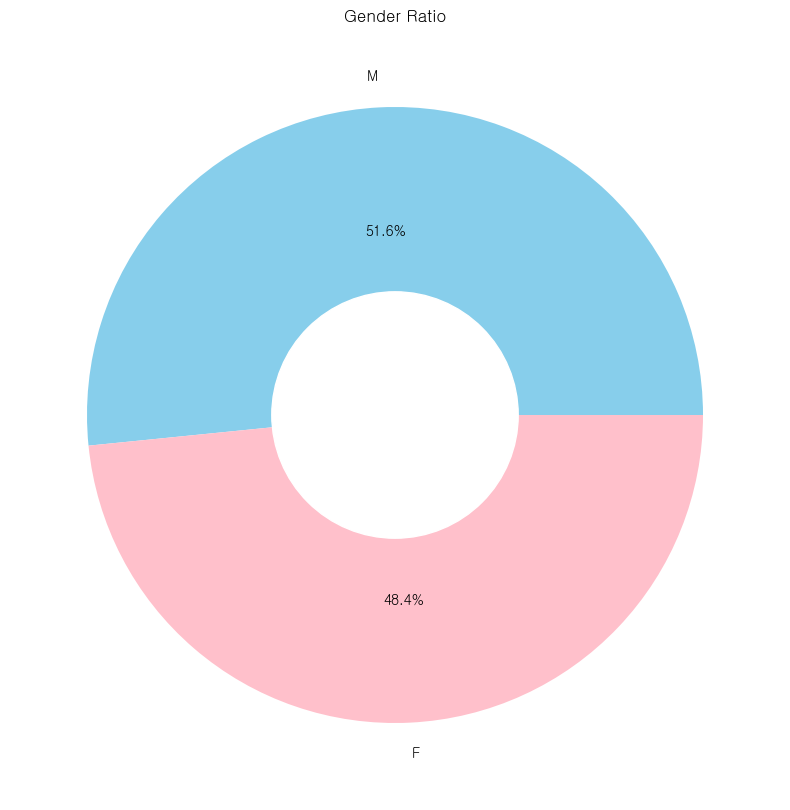

In [9]:
# 소비자 성별 비율 확인
Gender = df['Customer_Gender'].value_counts()

# 파이차트 생성
plt.figure(figsize = (10, 10))
plt.pie(Gender.values, labels = Gender.index, colors = ['skyblue', 'pink'], autopct = '%1.1f%%')
plt.title('Gender Ratio')
my_circle = plt.Circle((0, 0), 0.4, color = 'white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [10]:
# 성별의 구성요소 확인
df['Customer_Gender'].unique()

array(['M', 'F'], dtype=object)

* 파이차트를 보면 남성 소비자의 비율이 근소하게 많음을 알 수 있다.

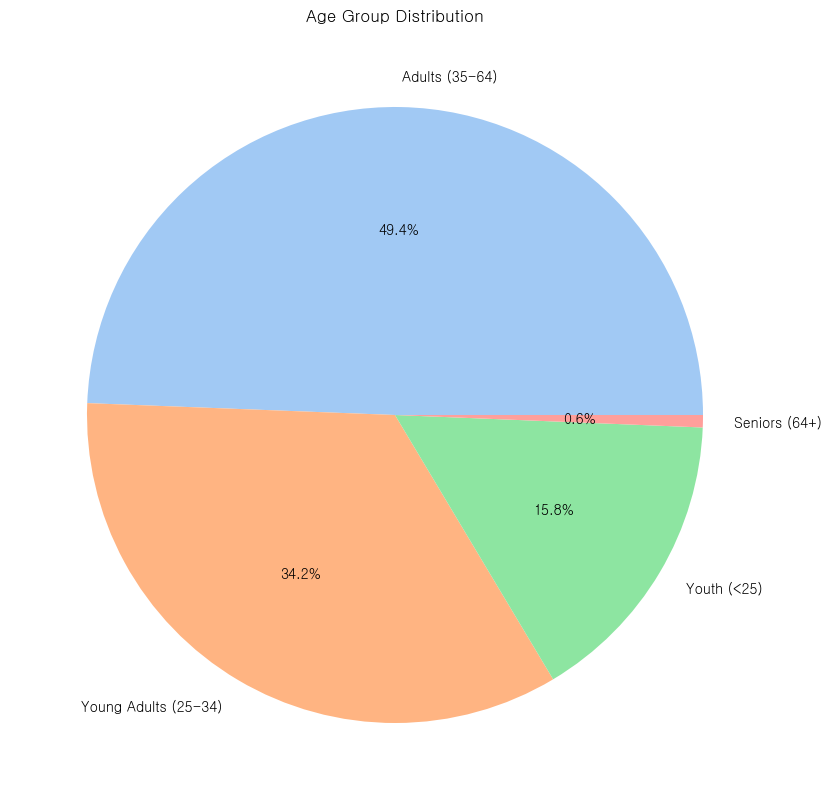

In [11]:
# 전체 연령그룹의 분포 확인
Age_Group = df['Age_Group'].value_counts()

# 파이차트 생성
sns.set_palette("pastel")
plt.figure(figsize = (10, 10))
plt.pie(Age_Group.values, labels = Age_Group.index, autopct = '%1.1f%%')
plt.title('Age Group Distribution')
plt.show()

* 연령대 그룹의 파이차트를 통해 분포를 확인해 본 결과, Adults(35-64)의 비율이 49.4%로 가장 높다.
* 반면 Seniors(64세 이상)의 비율은 0.6%로 거의 이용을 하지 않는다고 보여진다.

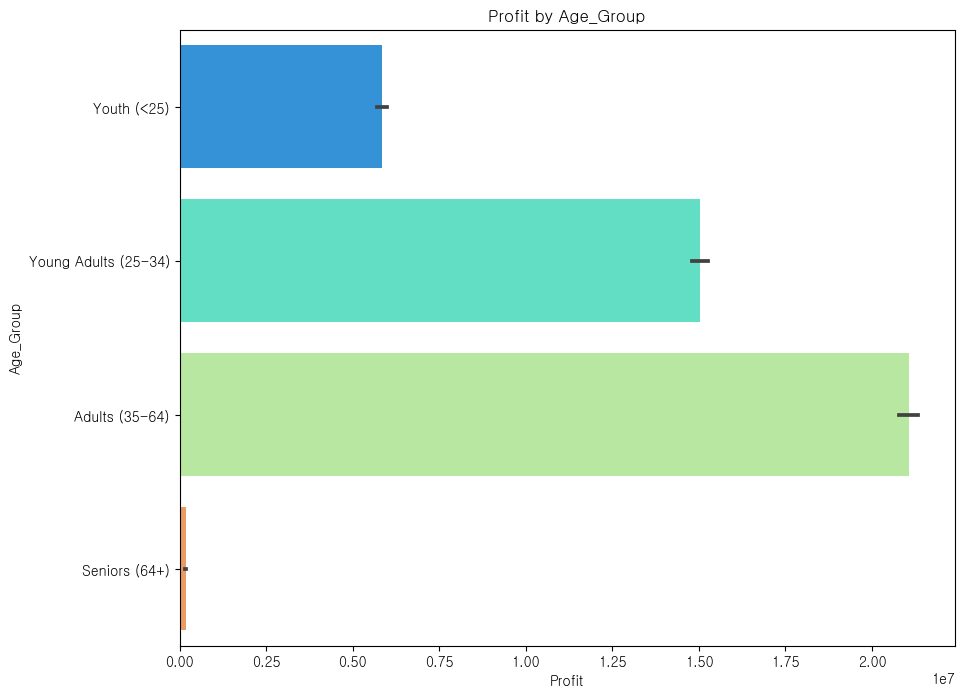

In [12]:
# 가장 높은 수익을 창출하고 있는 Age_Group 확인
plt.figure(figsize = (10, 8))
sns.barplot(df, x = df['Profit'], y = df['Age_Group'], estimator = sum, palette = 'rainbow')
plt.title('Profit by Age_Group')
plt.show()

* 막대그래프 결과를 보면, 가장 높은 수익을 창출하고 있는 연령대 그룹은 Adults(35-64)이다.
* Seniors(64세 이상)의 연령대 그룹에선 수익이 거의 나지 않는다.
* 이러한 결과은 앞선 파이차트 연령대 분포에서 확인했던 비중의 영향 때문일 수 있다.

Text(0.5, 1.0, 'Product order quantity by Age Group')

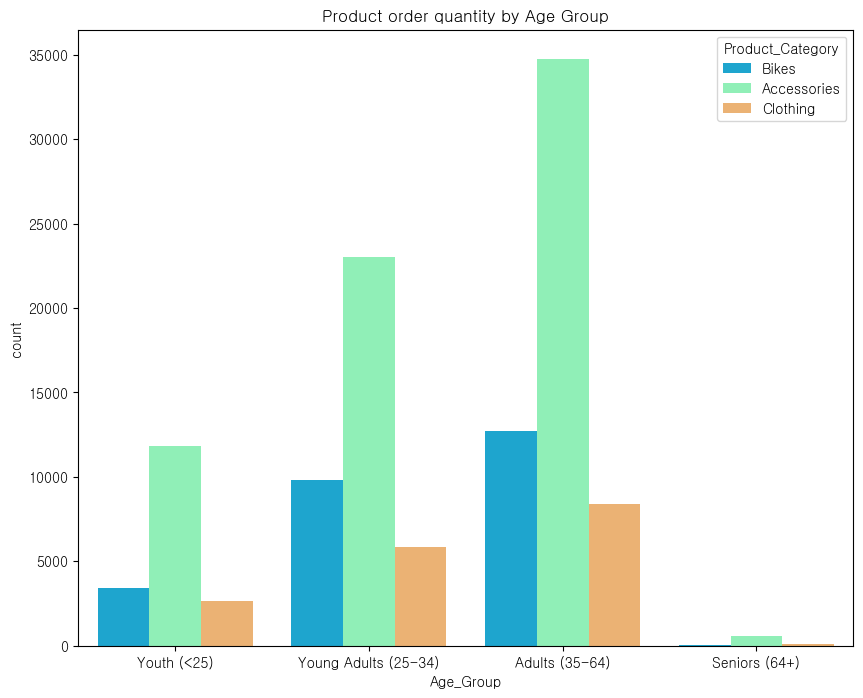

In [13]:
# 각 연령대별로 수량순서가 가장 많은 제품 확인
plt.figure(figsize = (10, 8))
sns.countplot(df, x = df['Age_Group'], hue = df['Product_Category'], palette = 'rainbow')
plt.title('Product order quantity by Age Group')

* 위 그래프를 보면, Accessories는 모든 연령대에서 수량 주문이 가장 많은것으로 나타난다.
* Bikes는 모든 연령대에서 주문 2위를 차지했다.
* Clothing이 순서가 가장 적다.
* Youth에서 Bikes와 Clothing의 주문 비율이 거의 동일하다는 점이 주목할 만하다.

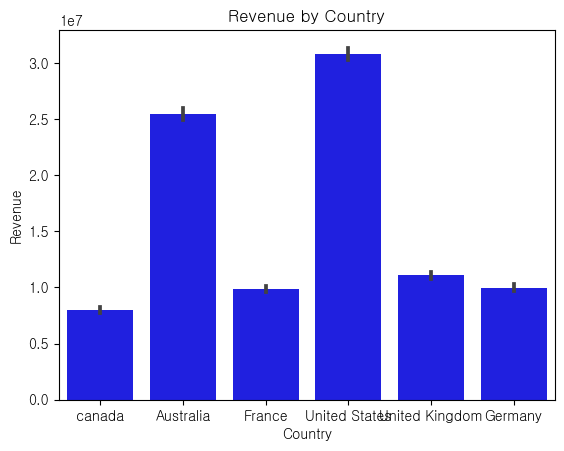

In [14]:
# Age_Group이 각 국가에 어떻게 분포되어 있는지 확인
sns.barplot(x = 'Country', y = 'Revenue', data = df, estimator = sum, color = 'blue')
plt.title('Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.show()

* 시각화 결과, 미국이 가장 높은 수익을 창출하는 반면, Cananda는 가장 낮은 수익을 창출하는 것으로 나타났다.

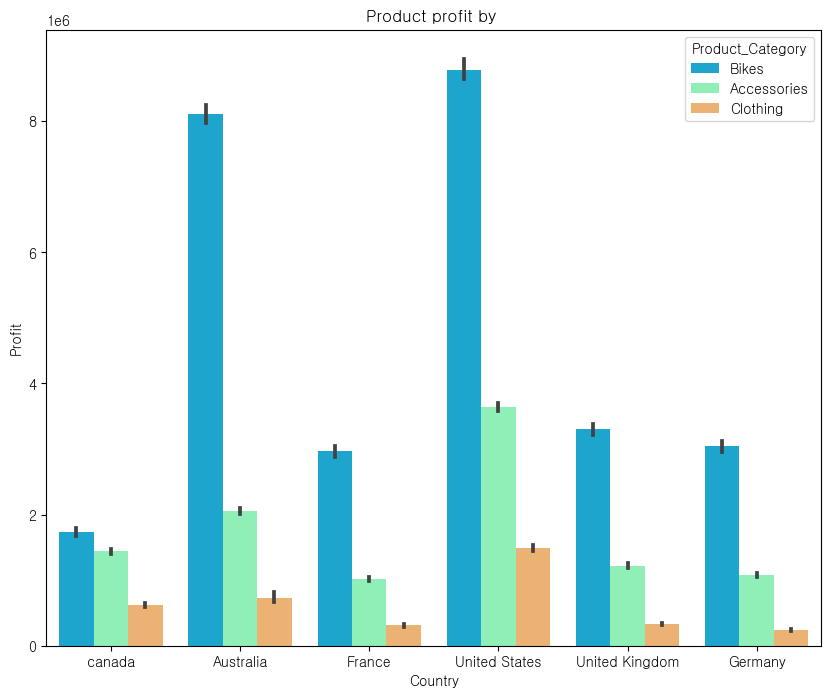

In [15]:
# 제품의 국가별 수익
plt.figure(figsize = (10, 8))
sns.barplot(df, x = df['Country'], y = df['Profit'], hue = df['Product_Category'], estimator = sum, palette = 'rainbow')
plt.title('Product profit by ')
plt.show()

* Bikes는 모든 국가에서 가장 높은 수익을 창출하고 있으며 Accessories와 Clothing이 그 뒤를 잇는다.
* 또한 미국에서는 모든 제품이 다른 나라의 다른 제품에 비해 높은 수익을 창출하고 있음을 알 수 있다.

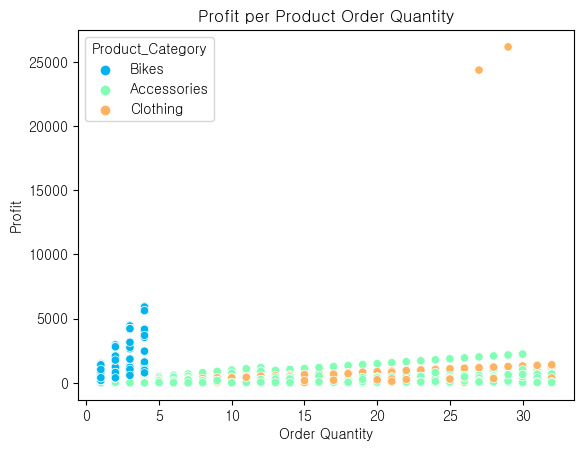

In [16]:
# 주문 수량이 많은 제품 카테고리의 수익이 더 높은지 시각화를 통해 확인
sns.scatterplot(x = 'Order_Quantity', y = 'Profit', hue = 'Product_Category', palette = 'rainbow', data = df)
plt.title('Profit per Product Order Quantity')
plt.xlabel('Order Quantity')
plt.ylabel('Profit')
plt.show()

* 산점도를 보면, Bikes는 주문 수량이 가장 적은 반면, Accessories, Clothing는 주문 수량이 상대적으로 많다는 것을 파악할 수 있다.
* 그러나 주문량이 적은 Bikes가 평균적으로 높은 수익을 창출하고 있음을 보인다.
* Clothing의 경우를 보면 가장 높은 두 개의 항목을 제외하곤 Bike보다 높은 수익을 창출한다고 보긴 어렵다.
* 그렇기에 주문량이 높다고 해서 그 수익도 높다고 볼 순 없다.

Text(0, 0.5, 'Profit')

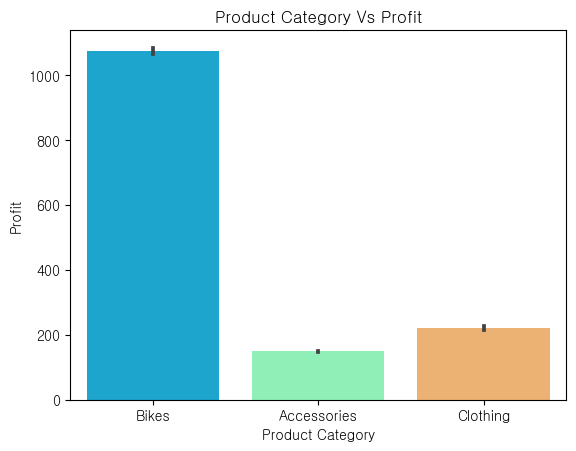

In [17]:
# 어떤 카테고리 항목이 높은 수익을 창출했는지 확인
sns.barplot(x = 'Product_Category', y = 'Profit', palette = 'rainbow', data = df)
plt.title('Product Category Vs Profit')
plt.xlabel('Product Category')
plt.ylabel('Profit')

* Bikes가 가장 높은 수익을 창출했고, Accessories는 가장 적은 수익을 올렸다.

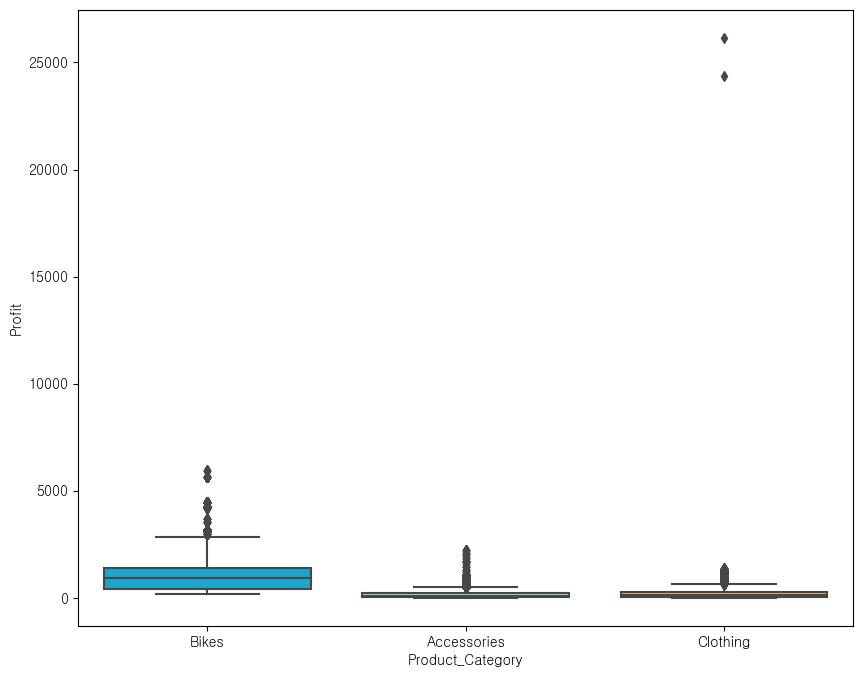

In [18]:
# 주어진 제품 카테고리별 이익률 확인
plt.figure(figsize = (10, 8))
category_column = 'Product_Category'
numerical_column = 'Profit'
sns.boxplot(x = category_column, y = numerical_column, data = df, palette = 'rainbow')
plt.show()

* 카테고리별 이익율 박스플롯을 확인해보면 Bikes 수익률이 가장 높은 것으로 알 수 있다.
* Clothing의 경우 이상값이 존재하는 것으로 파악 되는데 앞선 산점도 그래프와 유사한 이유하고 생각된다.

## 3. 결론

* Adults(35~64세) 연령대는 전국적으로 높게 분포되어 있고, Seniors(64세 이상)은 가장 적게 분포되어 있다.
* 이익창출률은 연령대별로 차이가 있으며, 연령대별로 Adults(35~64세)이 가장 높은 이익을 창출하고 있다.
* 미국은 모든 연령대의 분포를 가지고 있다.
* 미국은 모든 연령대에서 가장 높은 분배율과 관련된 가장 높은 수익과 이익을 창출하고 있다.
* 주문량이 가장 많은 상품 카테고리는 바이크 카테고리가 주문량이 가장 적지만, 상품 바이크의 이익률이 높은 상품 카테고리로 볼 수 있어 총 이익이 더 많은 카테고리로 해석되지는 않고 있다. 있다.

## 4. 활용방안

* 고객 연령대 분포를 파악한 후, 회사는 각 연령대별로 마케팅 전략을 조정할 수 있다. 예를 들어, 젊은 층(<25세)과 젊은 층(25세-34세)을 대상으로 한 소셜 미디어 및 인플루언서 마케팅을 더 많이 사용할 수 있다. 이는 다음과 같은 이점을 제공한다.
1. 회사는 마케팅 메시지를 각 그룹의 특정 요구와 선호도에 맞추어 전환율을 높임으로써 고객이 구매 행동을 취할 가능성을 높일 수 있습니다. 이는 회사의 전환율 증가와 매출 증가로 이어질 수 있습니다.
2. 보다 개인화된 고객 경험을 만들어 고객 충성도를 높힐 수 있다.
3. 특정 연령대를 대상으로 참여도를 높임으로써 각 그룹에 공감하는 마케팅 메시지를 만들고 그들의 관심사와 문제점을 직접 말할 수 있다. 이는 고객 참여도를 높이고 보다 긍정적인 고객 경험으로 이어질 수 있다.
4. 미국은 모든 연령대에서 가장 높은 분포를 가지고 있으며 가장 높은 수익과 수익을 창출하고 있으므로 회사는 여기에서 마케팅 전략을 강조하는 것을 고려할 수 있다.
5. 사업의 가치는 미래 수익을 창출하는 능력에 의해 결정되므로 가장 수익성이 높은 제품을 고려하는 것이 핵심이다. 따라서 Bikes는 수익성이 높기 때문에 판매에 더 집중하는 것을 고려할 수 있다.